# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")


# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

None of the columns have any missing values. The data is highly skewed towards the right, since the difference between the 75th percentile and the max value is huge. The following box plots confirm this. We have to apply log to these data, to make the skewed distribution approximately normal.

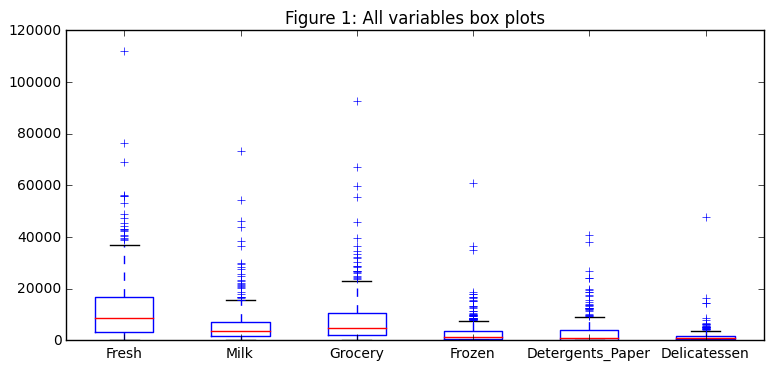

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(figsize=(9, 4))

#We MUST use np.array type as input to boxplot
axes.boxplot(np.array(data),showfliers=True)

#axes.boxplot(np.array(data), notch=False, sym='+', vert=True, whis=1.5,
#        positions=None, widths=None, patch_artist=False,
#        bootstrap=None, usermedians=None, conf_intervals=None)
axes.set_title('Figure 1: All variables box plots')

plt.setp(axes, xticks=[y+1 for y in range(len(data.columns))],
         xticklabels=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicatessen'])

plt.show()


The box plots clearly show that there are many outliers in all the variables, and since these variables are skewed right (skewed towards the higher values), applying a log to transform the variables could help to avoid the skewness in the distributions.

The following plot shows how the variables are distributed if we use log transformation.

c:\users\sekhar\anaconda\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
c:\users\sekhar\anaconda\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


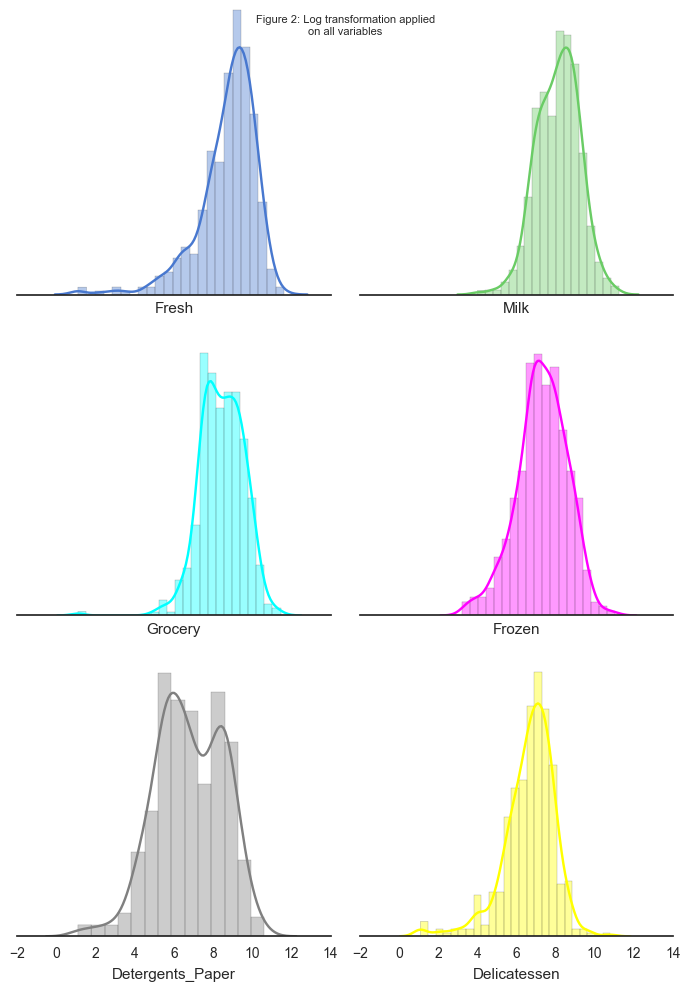

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(7, 10), sharex=True)
sns.despine(left=True)

#Transform all the variables to log base e
log_data = data.apply(np.log, axis=0, broadcast=False, raw=False, reduce=None)

# Plot a simple histogram with binsize determined automatically
sns.distplot(log_data["Fresh"], kde=True, color="b", ax=axes[0, 0])
sns.distplot(log_data["Milk"], kde=True, color="g", ax=axes[0, 1])
sns.distplot(log_data["Grocery"], kde=True, color="cyan", ax=axes[1, 0])
sns.distplot(log_data["Frozen"], kde=True, color="magenta", ax=axes[1, 1])
sns.distplot(log_data["Detergents_Paper"], kde=True, color="grey", ax=axes[2, 0])
sns.distplot(log_data["Delicatessen"], kde=True, color="yellow", ax=axes[2, 1])
f.suptitle('Figure 2: Log transformation applied \non all variables', fontsize=8)
#fig.suptitle('Long Suptitle', fontsize=24)
plt.setp(axes, yticks=[])
#plt.xticks(rotation=90)
plt.tight_layout()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Random selection 1: selected indices: 312, 368, 80
Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
312   2137  3737    19172    1274             17120           142
368  22335  1196     2406    2046               101           558
80    7005   829     3009     430               610           529

Random selection 2: selected indices: 208, 288, 292
Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
208   1537  3748     5838    1859              3381           806
288  16260   594     1296     848               445           258
292   2838  3086     4329    3838               825          1060

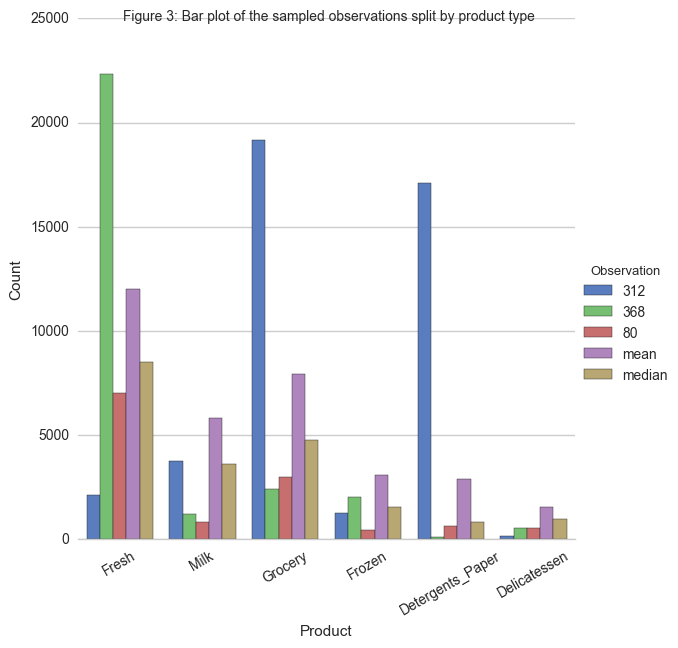

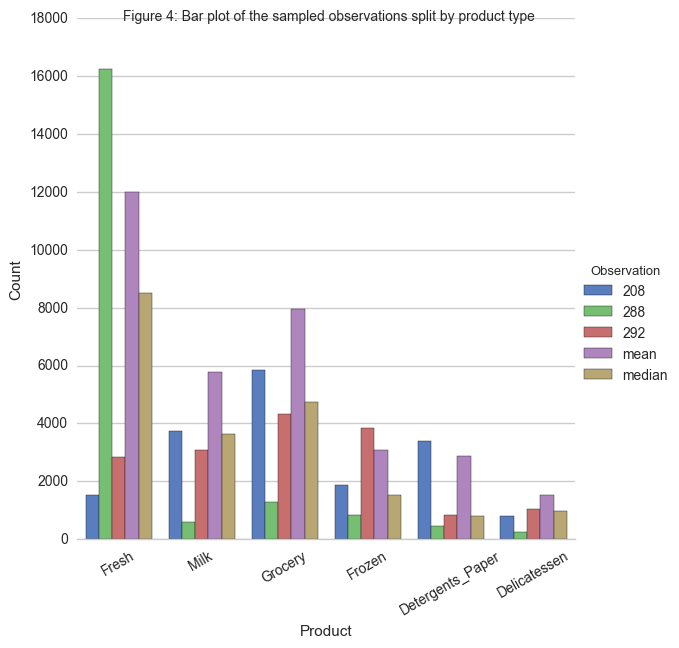

In [47]:
# TODO: Select three indices of your choice you wish to sample from the dataset
def get_samples(size=3,seed=12):
    import random
    random.seed(seed)
    indices = random.sample(range(0, len(data)-1),size)
    return indices   


def plot_bar_charts(indices,data,heading,display_mean=True,display_median=True):
    import pandas as pd
    import seaborn as sns
    sns.set(style="whitegrid")
    # Create a DataFrame of the chosen samples
    #samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
    #samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index()
    samples = pd.DataFrame(data.loc[indices], columns = data.keys())
    print "Chosen samples of wholesale customers dataset:"
    display(samples)
    
    #print indices
    #print data.head()
    if display_mean:
        mean_df = pd.DataFrame(data.apply(np.mean).apply(round))
        mean_df=mean_df.transpose()
        samples = samples.append(mean_df,ignore_index=True)
        indices = indices + ["mean"]

    if display_median:
        median_df = pd.DataFrame(data.apply(np.median).apply(round))
        median_df=median_df.transpose()
        samples = samples.append(median_df,ignore_index=True)
        indices = indices + ["median"]

    #Preparing the sampled data for plotting
    #Transpose the data first
    samples=samples.transpose().reset_index()
    
    
    #Change the column names
    samples.columns=["Product"]+indices
    
    #Melt the data
    samples=pd.melt(samples, id_vars=['Product'], value_vars=list(samples.keys()[1:]))
    samples.columns = ["Product","Observation","value"]
     
    g = sns.factorplot(x="Product", y="value", hue="Observation", data=samples,
                       size=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Count")
    g.set_xticklabels(rotation=30)
    g.fig.suptitle(heading) 
    #plt.ylim(0, np.max(np.array(data)))
    


indices=get_samples(size=3,seed=24)
print "Random selection 1: selected indices: {}, {}, {}".format(*indices) 
plot_bar_charts(list(indices),data,"Figure 3: Bar plot of the sampled observations split by product type", \
               display_mean=True,display_median=True)

indices=get_samples(size=3,seed=12)
print "Random selection 2: selected indices: {}, {}, {}".format(*indices) 
plot_bar_charts(indices,data,"Figure 4: Bar plot of the sampled observations split by product type", \
               display_mean=True,display_median=True)




We repeated the random sampling for two times and fetched 3 observations each time.

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
From Figures 3 and 4 above, we can infer that there are customers who buy the _Fresh_ products more than any other products (see the green bars). These green bars show that if a customer buys huge amount of _fresh_ products (way above the average _fresh_ products), then such customers may buy below average amounts of the other products. Such customers might be vegetable markets, which sell fresh vegetables or fresh produce mostly. From Figure-3, the blue bar might represent a customer that sells more of the non-perishable items than the perishable items (fresh produce or milk or meats). The brick red colored bar is hard to interpret, and it may be a retail shop that sells all kinds of products, mostly related to Delicatessen or it could be a restaurant. But looking at the barcharts we can conclude that there are at least 2 or 3 types of customers (customers who buy most of the _fresh_ products, customers who buy average of the non-perishable items more than the perishable items).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
features =  data.columns
scores = {}
#print data
for dependent_feature in features:
    
    independent_data = data.copy()
    dependent_data = independent_data.pop(dependent_feature)
    #print dependent_data
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.25, random_state=42)
    
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train,y_train)
    scores[dependent_feature] = regressor.score(X_test,y_test)
display(pd.DataFrame(scores.values(), index=scores.keys(),columns=["R-squared"]))


R-squared
Grocery            0.681884
Frozen            -0.210136
Delicatessen      -2.254712
Detergents_Paper   0.271667
Fresh             -0.385750
Milk               0.156275

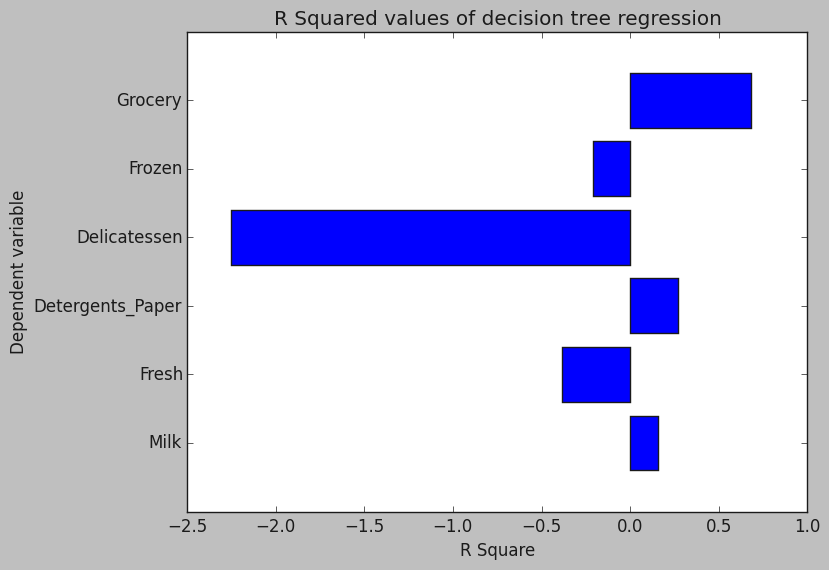

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
items = scores.keys()
y_pos = np.arange(len(items))
r_sq = scores.values()


ax.barh(y_pos, r_sq, align='center',
        color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(items)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('R Square')
ax.set_ylabel('Dependent variable')
ax.set_title('R Squared values of decision tree regression')

plt.show()

Except the _Grocery_ variable, all other variables R-Squared value is either negative or less than 0.3. But for _Grocery_, we have an R-Squared value of 0.68, which shows that the _Grocery_ variable is linearly dependent on other variables in the data set. This also suggests that we can drop the _Grocery_ variable from the data set, since this variable is collinear to the other variables (collinear variables represent the same set of information, and inclusion of collinear variables will unnecessarily increases the dimensions). 

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I tested treating each of the feature as independent (so tested all features). Except the _Grocery_, all other variables R-Squared value is either negative or is less than 0.3. The R-Squared of _Grocery_ variable is 0.68, showing that this variable is linearly dependent on other variables in the data set.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

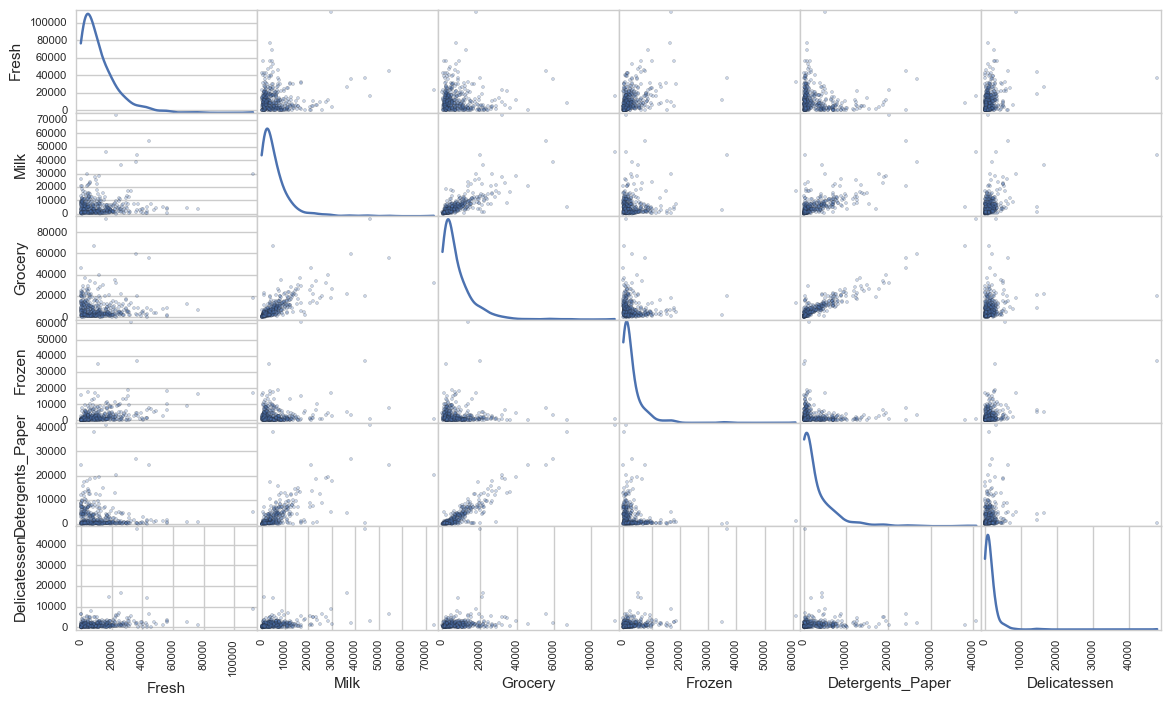

In [49]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Let us also plot a heat map.

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

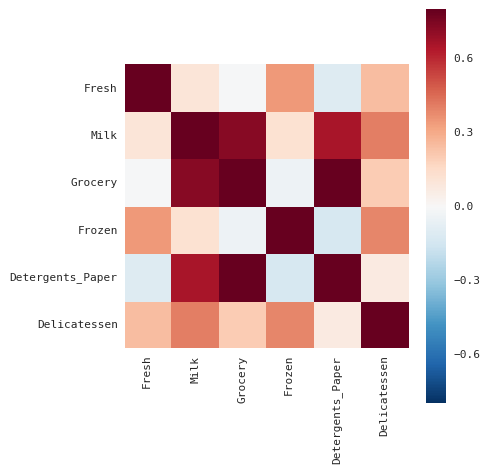

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
#df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = data.corr()
display(corrmat)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

_From the scatter plots_

We can clearly see that _Grocery_ has a positive correlation with _Detergents-Paper_, and with _Milk_ (although the relationship with _Milk_ is not as strong as with _Detergents-Paper_. As the value of the _Grocery_ increases, the variance in the _Milk_ increases, but for _Detergents-Paper_ there is no increase in variance with the increase of _Grocery_ value). 
None of these three variables in the data set are normally distributed. They have a right skewed distribution, with majority of values less than 20000 for _Milk_ and _Grocery_, and less than 10000 for _Detergents-Paper_ 

This confirms our suspicion that _Grocery_ has a linear relationship with the other variables in the data set.

_From the heat map_

From the above plot, we can identify that a strong positive correlation exists between _Grocery_ and _Detergents-Paper_. There is also positive correlation between _Grocery_ and _Milk_ (although the correlation is not as strong as the correlation between _Grocery_ and _Detergents-Paper_). There is also some correlation (of greater than 0.5) between _Milk_ and _Detergents-Paper_. There is no strong correlation between _Fresh_ and any other products. The heat map also confirms that _Grocery_ has a linear relationship with the other variables in the data set.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

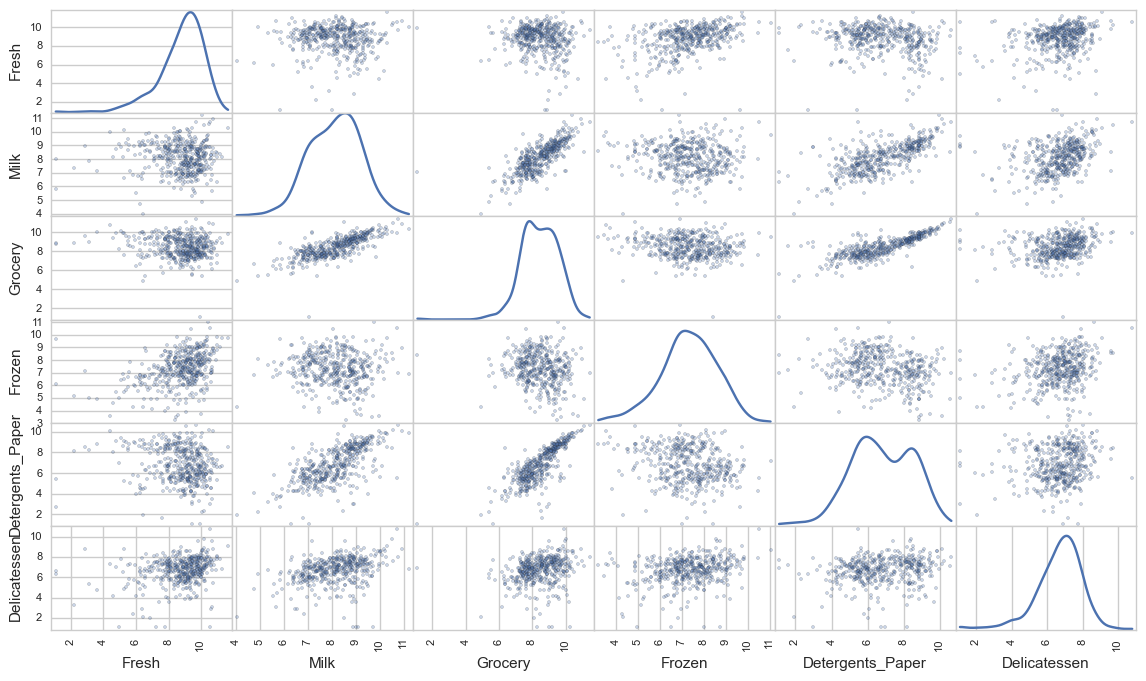

In [50]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
indices=get_samples(size=3,seed=12)
log_samples = log_data.iloc[indices]

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000 -0.019834 -0.132713  0.383996         -0.155871   
Milk             -0.019834  1.000000  0.758851 -0.055316          0.677942   
Grocery          -0.132713  0.758851  1.000000 -0.164524          0.796398   
Frozen            0.383996 -0.055316 -0.164524  1.000000         -0.211576   
Detergents_Paper -0.155871  0.677942  0.796398 -0.211576          1.000000   
Delicatessen      0.255186  0.337833  0.235728  0.254718          0.166735   

                  Delicatessen  
Fresh                 0.255186  
Milk                  0.337833  
Grocery               0.235728  
Frozen                0.254718  
Detergents_Paper      0.166735  
Delicatessen          1.000000

None


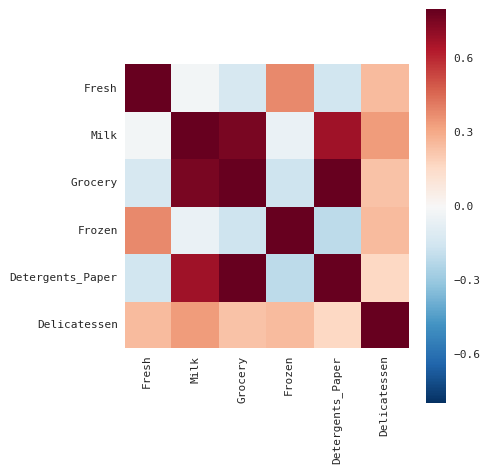

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
#df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
log_corrmat = log_data.corr()
print display(log_corrmat)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Draw the heatmap using seaborn
sns.heatmap(log_corrmat, vmax=.8, square=True)

f.tight_layout()

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [51]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
208  7.337588  8.228978  8.672144  7.527794          8.125927      6.692084
288  9.696463  6.386879  7.167038  6.742881          6.098074      5.552960
292  7.950855  8.034631  8.373092  8.252707          6.715383      6.966024

**Answer**

After applying the natural logarithm, all the variables have approximately normal distribution. The correlation between _Grocery_ and _Detergents-Paper_ has reduced from 0.92 to 0.796. The scatter plot between _Grocery_ and _Detergents-Paper_ also show that at lower values of _Grocery_ (log transformed) are having bigger variance for _Detergents-Paper_ (log transformed). But such variance is not observed in untransformed scatter plot.

After applying the log transformation, the correlation between _Grocery_ and _Milk_ has increased from 0.73 to 0.76. In the non-transformed scatter plot, we found that the _Milk_ variable has higher variance as the _Grocery_ value increases. But such variance is eliminated in log transformed variables (_Milk_ and _Grocery_). 

The correlation between Milk and detergents has increased slightly.


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [52]:
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],q=25,axis=0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],q=75,axis=0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers = outliers+log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()

print "Found a total of {} outliers\n".format(len(outliers))
# OPTIONAL: Select the indices for data points you wish to remove
unique, counts = np.unique(outliers, return_counts=True)
outliers_copy=outliers
outliers = (pd.DataFrame(zip(unique,counts),columns=["Index","Count"]).sort_values(by=["Count"]))
outliers=outliers[outliers["Count"]>1]
print "Common outliers in more than one column"
display(outliers)


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers["Index"]]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Found a total of 48 outliers

Common outliers in more than one column


Index  Count
4      75      2
3      66      2
2      65      2
11    128      2
15    154      3

We considered an observation as an outlier if and only if the observation has at least two variables which are outliers. 

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Yes. The following observations (listed in the Index column) are having more than one variable as the outlier. The Count column in the below data frame shows how many variables are having the outliers for the specific observation. We found a total of 48 outliers (observations for which there is at least one variable as an outlier). But if we remove these 48 observations from the data set, then we are potentially removing approximately 10% of the data, which is not advisable. So we are removing the observations, which have at least 2 variables as the outliers (found 5 such observations, given below)

In [53]:
display(outliers)

Index  Count
4      75      2
3      66      2
2      65      2
11    128      2
15    154      3

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


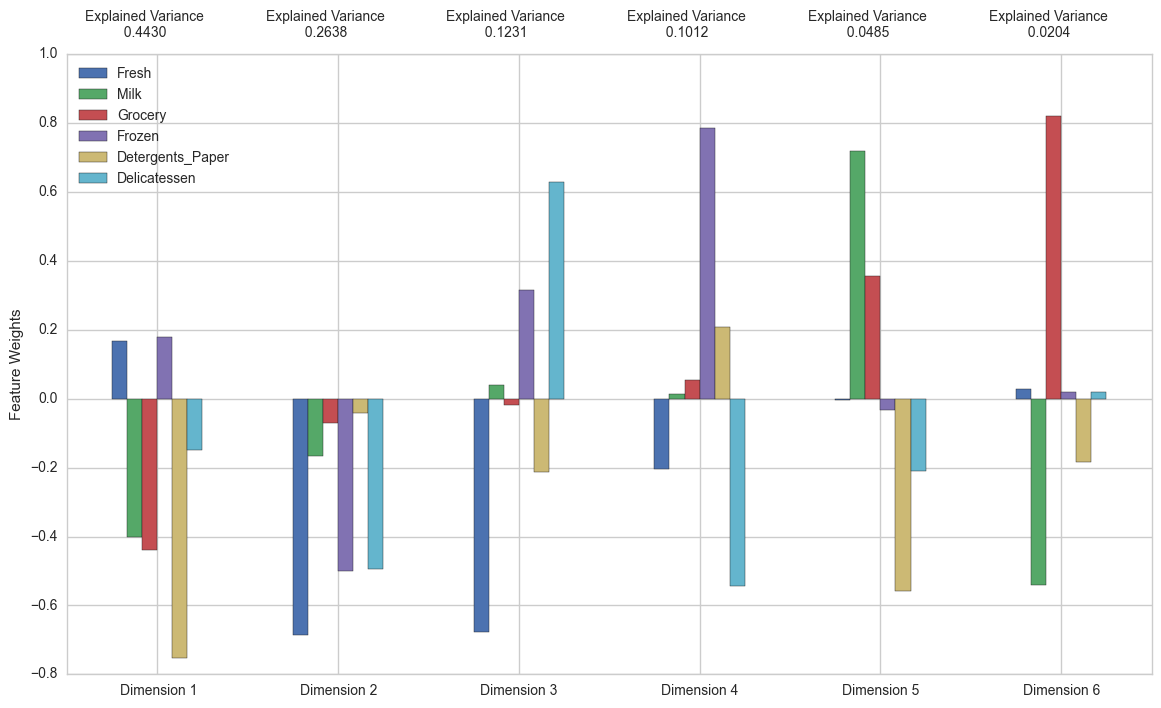

In [54]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=42)
pca.fit(good_data)
print pca.explained_variance_ratio_
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
#print pca_samples

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [55]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -1.3331       0.7915       0.7496       0.7440      -0.5955   
1       2.0155       0.6299      -1.4269      -0.2691      -1.0653   
2       0.1267      -0.0138       1.0314       0.7247      -0.1371   

   Dimension 6  
0      -0.1600  
1       0.0001  
2      -0.0050

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

In [56]:
#You have to normalize the variance explained by each of the PC
#explained_var = pca.explained_variance_/np.sum(pca.explained_variance_)
#or use the following:
explained_var = pca.explained_variance_ratio_

#Variance explained by the first and second component
print "% of variance explained by the first 2 principal components:{}%".format(sum(explained_var[0:2])*100)
print "%variance explained by the first 4 principal components:{}%".format(sum(explained_var[0:4])*100)
print "Eigen values {}".format(pca.explained_variance_ratio_)

% of variance explained by the first 2 principal components:70.6817230807%
%variance explained by the first 4 principal components:93.1090109951%
Eigen values [ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


*First _Principal Component_ or PC-1*

The first PC shows positive coefficients for _Fresh_ and _Frozen_ variables, while a biggest negative coefficient for _Detergents-Paper_ and bigger negative coefficients for _Milk_ and _Grocery_. These coefficients suggest that as the values of the _Fresh_ and/or _Frozen_ values of observations increase (keeping all other variables constant), the observations become more isolated on the first PC dimension, from the remaining observations on the first PC dimension. Similarly, as the _Detergents-paper_ increase, the observations will move away from the observations for which _Fresh_ and/or _Frozen_ variables either remain constant or increase. If all variables of observations increase, then such observations will move more towards the class which has more _Detergents-Paper_ count. If all variables decrease, then such observations will move away from the class which has more _Detergents-Paper_ count. The rate of isolation happening in this dimension is the greatest, since its explained variance percentage is the largest (44.3%). In summary, PC-1 will isolate the observations using the following two groups of variables: (_Fresh_,_Frozen_) and (_Milk_, _Detergents-Paper_, _Grocery_, _Delicatessen_). As the values of these groups increase, the isolation between the two sets of observations will increase. If one group increases and the other group decreases (at the same rate), the isolation between the two groups will remain constant or grows if one group increases more rapidly than the other group decreases. If both groups values decrease, then the isolation decreases. 

*Second _Principal Component_ or PC-2*

The second PC will make the observations move on the same direction (on the second PC dimension), as the values of all observations increase/decrease together. If all variables increase/decrease at the same rate, then the higher the values of _forzen_, _fresh_, _Delicatessen_, the faster they move compared to the _Milk_, _Grocery_ and _Detergent-Paper_. But the rate of isolation happening in this dimension is lesser than the PC-1 dimension, since the PC-2 explained variance percentage (26.3%) is lesser than PC-1 explained variance percentage (44.3%). The movement in this dimension is perpendicular to the PC-1 dimension (and all other PCs).

*Third _Principal Component_ or PC-3*

The PC-3 divides the observations into two groups, based on the values in each of the two groups: (_Milk_, _Frozen_,_Delicatessen_) and (_Fresh_,_Detergents-Paper_,_Grocery_). As the values of these groups increase, the isolation between the two groups increase (on the PC-3 dimension). If the both the groups variables values decrease, the isolation decreases, and if one group increase and the other group decrease, then the isolation will either decrease/increase/remains constant, based on the rate of increase and decrease of values. Within the group, if _Delicatessen_ and/or increase, then the observations will move away from the _Milk_. Within the second group, if the _Fresh_ and/or _Detergents-Paper_ increases, then it will move the observations away from _Grocery_

*Fourth _Principal Component_ or PC-4*

The PC-4 divides the observations into two groups, based on the values in each of the two groups: (_Fresh_,_Delicatessen_) and  (_Milk_, _Frozen_,_Detergents-Paper_,_Grocery_). As the values of these groups increase, the isolation between the two groups increases (on the PC-3 dimension). If the both the groups variables values decrease, the isolation decreases, and if one group values increase and the other group values decrease, then the isolation will either decrease/increase/remains constant, based on the rate of increase/decrease of variables values in the groups. Within the group, if _Delicatessen_ increases, then the observations will move away from the _Fresh_. Within the second group, if the _Frozen_ and/or _Detergents-Paper_ increase, then it will move the observations away from _Milk_, and _Grocery_

*NOTE* that in the above discussion whenever I say group value, I am referring to cumulative value of the variables in the group after applying the transformation using the PC. Also the effect of isolation decreases in the order PC-1, PC-2, PC-3 and PC-4.




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

Transformed data to PC dimensions


Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
208      -1.3331       0.7915       0.7496       0.7440      -0.5955   
288       2.0155       0.6299      -1.4269      -0.2691      -1.0653   
292       0.1267      -0.0138       1.0314       0.7247      -0.1371   

     Dimension 6  
208      -0.1600  
288       0.0001  
292      -0.0050

Chosen samples of wholesale customers dataset:


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
208  7.337588  8.228978  8.672144  7.527794          8.125927      6.692084
288  9.696463  6.386879  7.167038  6.742881          6.098074      5.552960
292  7.950855  8.034631  8.373092  8.252707          6.715383      6.966024

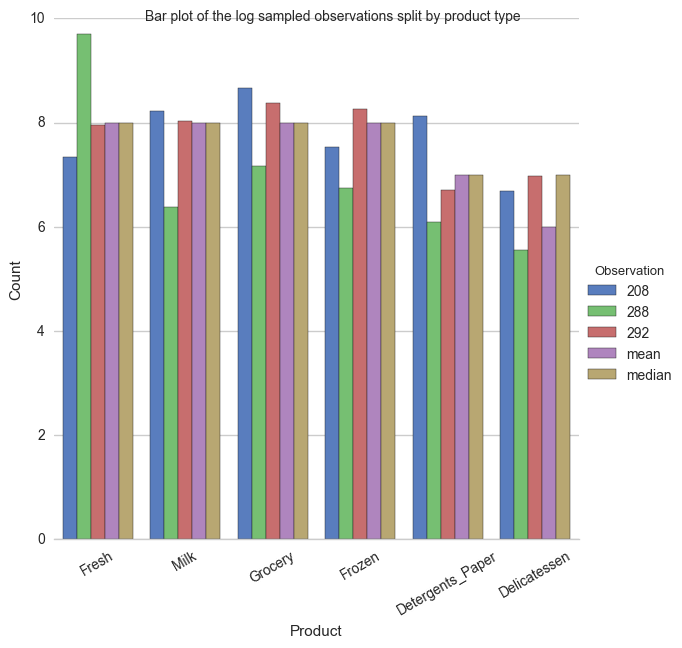

In [57]:
# Display sample log-data after having a PCA transformation applied
print "Transformed data to PC dimensions"
#print pca_samples
sample_pca_transformed = pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values, index=log_samples.index.tolist())
#display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values, index=log_samples.index.tolist()))
display(sample_pca_transformed)
plot_bar_charts(log_samples.index.tolist(),log_samples,"Bar plot of the log sampled observations split by product type")


#pd.scatter_matrix(sample_pca_transformed, alpha = 0.3, figsize = (14,8));

In the PC analysis, we concluded that the PC-1 will group the data based on the values of the variables in the two groups: (Fresh,Frozen) and (Milk, Detergents-Paper, Grocery, Delicatessen). Since _Fresh_ value of 288th observation is the largest, the PC-1 should separate the 288th observation from two other observations for which the _Fresh_ value is less. This is evident from the Dimension-1 coordinates (of 3 observations). The 288th observation has a positive coordinate (for Dimension-1) as 2.0155, while the other 2 observations (208 and 292) have -1.33 and 0.1267 respectively. This coincides our conclusion made (in the section _*Implementation: Selecting Samples*_) while analyzing the sampled values. The Dimension-1 coordinate of observations 208 and 292 (-1.33 and 0.1267 respectively) are different, since observation 208 has a bigger value for _Detergents-Paper_ value than 292.

The PC2 (or Dimension-2), has grouped the observations 208 and 288 almost saome (since there is not much difference between the values of Dimension-2 for these 2 observations), while the observation 292 has almost a 0 value for Dimension-2. This could be due to the fact that the _Frozen_ value of 292nd observation is higher than the 208 and 288 observations.

The Dimension-3 has separated the 288th observation from the remaining 2 observations (based on the absolute values difference for dimension-3 values). The dimension-3 partitions the data based on the two groups vof variables: (Milk, Frozen,Delicatessen) and (Fresh,Detergents-Paper,Grocery). Since 288 observation has the highest Fresh, this observation is somewhat separated from the other 2 observations.

The PC-4 also separates the 288th observation from the remaining observations, since PC-4 considers the _Delicatessen_ and _Frozen_ as important variables, and these variables are almost similar for 208 and 292 observations, but dissimilar to 288th observation. 

We can conclude that the 288th observation, which has a higher value for _Fresh_ variable, should belong to a separate group than the other 2 observations (208 and 292, which have lesser _Fresh_ value).

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [58]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,copy=True,random_state=42)
pca.fit(good_data)


# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [59]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -1.3331       0.7915
1       2.0155       0.6299
2       0.1267      -0.0138

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

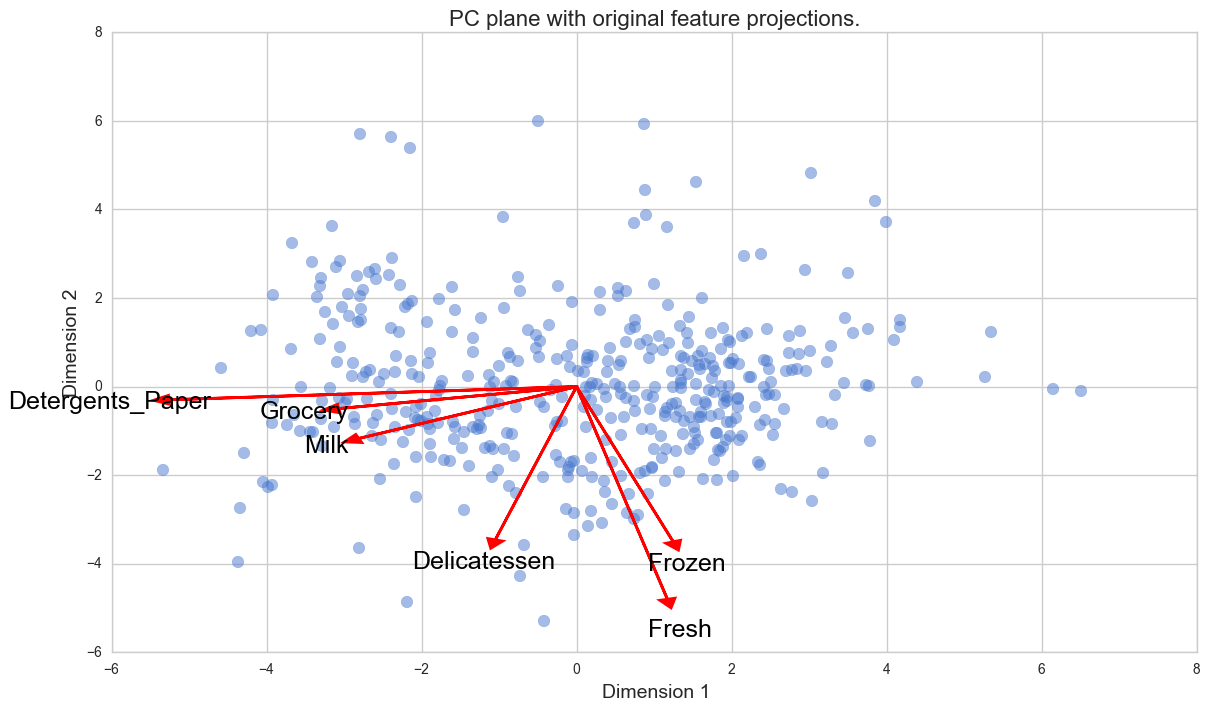

In [60]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

The _Detergents-Paper_, _Grocery_ and _Milk_ (descending order) are correlated to Dimension-1, while _Fresh_ and _Frozen_ are correlated to Dimension-2. The Delicatessen is more correlated to Dimension-2 than Dimension-1, although none of the correlations are strong. I measured the correlation by visually checking how parallel the vector is to the axes of the garph.

Yes. These observations agree with the pca_results plot (We mentioned that Dimension-1 places more emphasis on Detergents-paper, Milk and Grocery (since their coefficients in Dimension-1 are relatively large). Dimension-2 places more emphasis on Fresh, Frozen and Delicatessen, since there coefficients are larger than the other variables.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K Means Clustering algorithm is easy to implement and is computationally more efficient than other clustering algorithms. It has the following disadvantages:

1. We need to estimate the value of K, and if this value is not chosen properly, then the data is not separated into classes optimally.
2. We get different clusters based on the initial choices of centroids. If centroids are not chosen properly, then clusters separation may not be optimal
3. There is a possibility of forming empty clusters
4. K-means performs hard clustering, which means, a point can belong to one and only one cluster.

Gaussian mixture models help us to cluster the data assuming that the data was generated from K gaussian distributions. If the data is indeed generated by approximately normal distributions then gaussian mixture models will seperate the clusters optimally. The assignment of an observation to a cluster is based on the probability that it belongs to that cluster. So soft clustering is possible for gaussian mixture models.

The Gaussian Mixture model will use a specific shape to the cluster (oval shape), and if the actual cluster shape is not the same as the Gaussian moldel's shape, then our clustering might not be correct.

For the given data, I would use K- means, since it does not assume any specific shape to the clusters (although K Means behave well for spherical shaped clusters. Also I would like to avoid using soft clustering for this data to make the clustering simple.

But unless we try fitting both the clustering models, we cannot say which model outperforms the other.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

Since we are considering the K Means clustering, we can use the distortions score to determine the optimal number of clusters. The following code will help us to determine the required number of clusters. In the following code, we will use the "k-means++" option, so that we will select the optimal initial points (which are distant) using k-means++ technique, instead of selecting the initial points randomly. Selecting distant points as the initial points will help to converge the algorithm quickly.

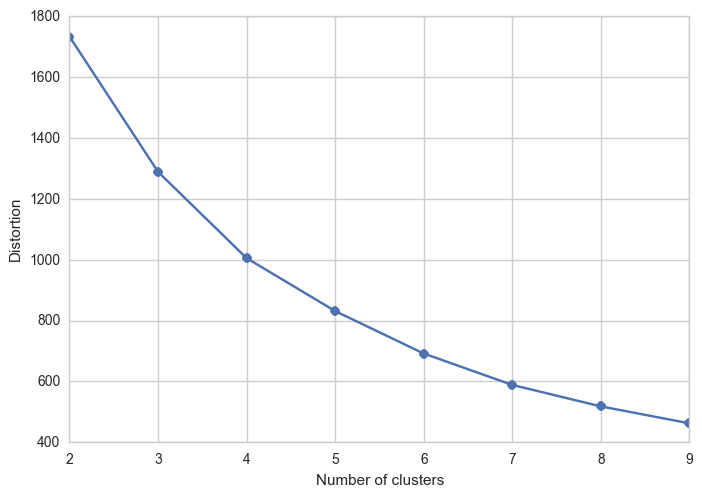

In [61]:
from sklearn.cluster import KMeans

distortions=[]
n_clusters=range(2,10)

for i in n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i, init='k-means++',  n_init=10, max_iter=300, tol=1e-04, random_state=42)
    clusterer.fit(reduced_data)
    
    distortions.append(clusterer.inertia_)
    
plt.plot(n_clusters, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As we move towards the x-axis (horizontal axis) in the above plot, the rate of decrease in the distortion decreases. The optimal number of clusters sholud be less than or equal to 6, since the rate of decrease in distortion score is less beyond 6. We will use silhouette scores to determine the optimal number of clusters.

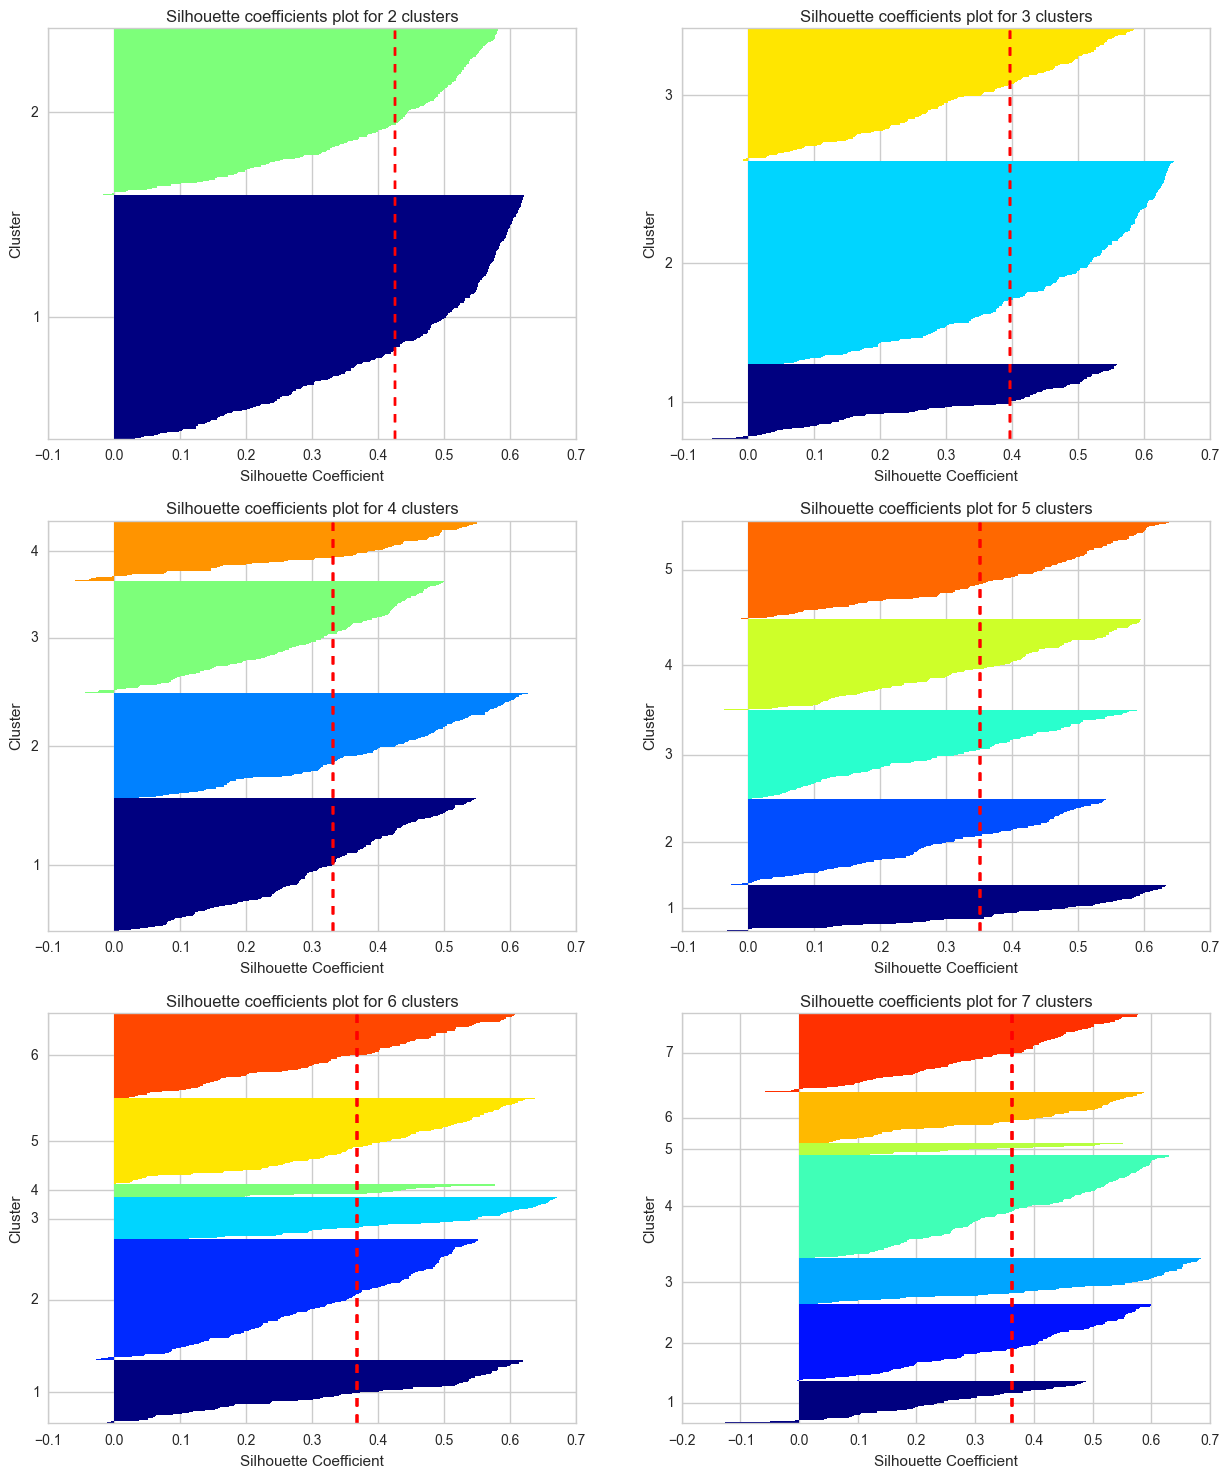

In [62]:
def plot_silhouette_plot(clusterer, data,random_state,ax):
            from matplotlib import cm
            from sklearn.metrics import silhouette_samples

            clusterer.fit(data)

            # TODO: Predict the cluster for each data point
            preds = clusterer.predict(data)
            #print preds

            #Get the cluster lables
            cluster_labels = np.unique(preds)
            #print cluster_labels

            #TODO: Find the cluster centers
            centers = clusterer.cluster_centers_
            #print centers

            # TODO: Predict the cluster for each transformed sample data point
            #sample_preds = clusterer.predict(pca_samples)
            #print sample_preds

            silhouette_vals = silhouette_samples(reduced_data, preds, metric='euclidean')
            distortions.append(clusterer.inertia_)
            #print silhouette_vals

            # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
            score = np.mean(silhouette_vals)
            #print score
            #score.append(np.mean(silhouette_vals))

            n_clusters = cluster_labels.shape[0]

            y_ax_lower, y_ax_upper = 0, 0
            yticks = []

            for i, c in enumerate(cluster_labels):
                c_silhouette_vals = silhouette_vals[preds == c]
                c_silhouette_vals.sort()
                y_ax_upper += len(c_silhouette_vals)
                color = cm.jet(float(i) / n_clusters)
                ax.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, \
                edgecolor='none', color=color)
                yticks.append((y_ax_lower + y_ax_upper) / 2)
                y_ax_lower += len(c_silhouette_vals)
                silhouette_avg = np.mean(silhouette_vals)
                ax.axvline(silhouette_avg, color="red",
                 linestyle="--")
                ax.set_yticks(yticks)
                ax.set_yticklabels(cluster_labels + 1)
            ax.set_ylabel('Cluster')
            ax.set_xlabel('Silhouette Coefficient')
            ax.set_title('Silhouette coefficients plot for {} clusters'.format(n_clusters) )
            return silhouette_avg

fig, ax = plt.subplots(nrows=3, ncols = 2, figsize=(15,18))

scores = []

clusterer = KMeans(n_clusters=2, init='k-means++',  n_init=5, max_iter=300, tol=1e-04, random_state=0)
score=plot_silhouette_plot(clusterer, reduced_data,0,ax[0,0])
scores.append(score)

clusterer = KMeans(n_clusters=3, init='k-means++',  n_init=5, max_iter=300, tol=1e-04, random_state=0)
score=plot_silhouette_plot(clusterer, reduced_data,0,ax[0,1])
scores.append(score)

clusterer = KMeans(n_clusters=4, init='k-means++',  n_init=5, max_iter=300, tol=1e-04, random_state=0)
score=plot_silhouette_plot(clusterer, reduced_data,0,ax[1,0])
scores.append(score)

clusterer = KMeans(n_clusters=5, init='k-means++',  n_init=5, max_iter=300, tol=1e-04, random_state=0)
score=plot_silhouette_plot(clusterer, reduced_data,0,ax[1,1])
scores.append(score)

clusterer = KMeans(n_clusters=6, init='k-means++',  n_init=5, max_iter=300, tol=1e-04, random_state=0)
score=plot_silhouette_plot(clusterer, reduced_data,0,ax[2,0])
scores.append(score)

clusterer = KMeans(n_clusters=7, init='k-means++',  n_init=5, max_iter=300, tol=1e-04, random_state=0)
score=plot_silhouette_plot(clusterer, reduced_data,0,ax[2,1])
scores.append(score)


**Analysis**

* For 2 clusters, the cluster sizes are different, but the average silhouette coefficient is the largest. There are negligible number of of observations which are less than 0. Hence the 2 clusters could be the best way to divide the data into independent groups.

* The 3 and 4 clusters are having different cluster sizes, and also their average silhouette coefficients are much less than the 2 clusters average silhouette coefficient. Hence we will not consider 3 and 4 level clustering.

* For 5 clusters, only one cluster's size is slightly different. But the average silhouette coefficient is very less than the 2 cluster value. Hence we will reject the 5 level clustering.

* For 6 and 7 clusters, the sizes are unequal, and reject them given their average coefficients values.

Hence we will consider the optimal number of clusters as *2*.

The following code will create 2 clusters based on k-means clustering, and predicts the sample data's classes.


In [63]:
from matplotlib import cm
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, init='k-means++',  n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
#print preds

#Get the cluster lables
cluster_labels = np.unique(preds)
#print cluster_labels

#TODO: Find the cluster centers
centers = clusterer.cluster_centers_
#print centers

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

print "The three sampled observations belong to classes {}".format(sample_preds)

The three sampled observations belong to classes [1 0 0]


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

We chose 2 as the optimal number of clusters (see the above section). The Average silhouette coefficients are displayed below. 

In [64]:
display(pd.DataFrame(zip(range(2,8),scores),columns=["No. of Clusters","Avg. Silhouette score"]))

No. of Clusters  Avg. Silhouette score
0                2               0.426281
1                3               0.396891
2                4               0.332010
3                5               0.350991
4                6               0.368647
5                7               0.363315

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

PCA Coordinates of the samples
[[-1.33307514  0.79153986]
 [ 2.01546836  0.62985582]
 [ 0.12671103 -0.01381693]]


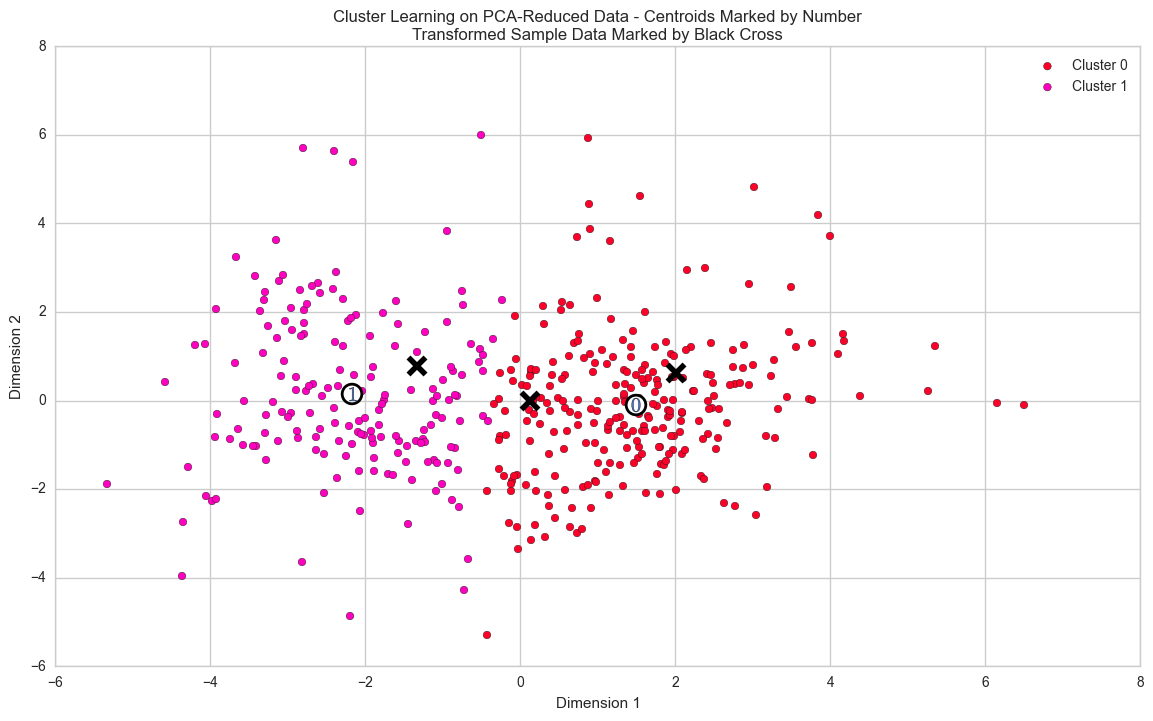

In [78]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)
print "PCA Coordinates of the samples"
print pca_samples

The third observation is plotted at the border between the two clusters. Although it is classified as a cluster 0 observation, it might belong to cluster 1, since the observation is present at the boarder between the 2 classes.

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [81]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(clusterer.cluster_centers_)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]

true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments


#indices=get_samples(size=3,seed=12)
#print "Random selection 2: selected indices: {}, {}, {}".format(*indices) 
#plot_bar_charts(indices,data,"Figure 4: Bar plot of the sampled observations split by product type")



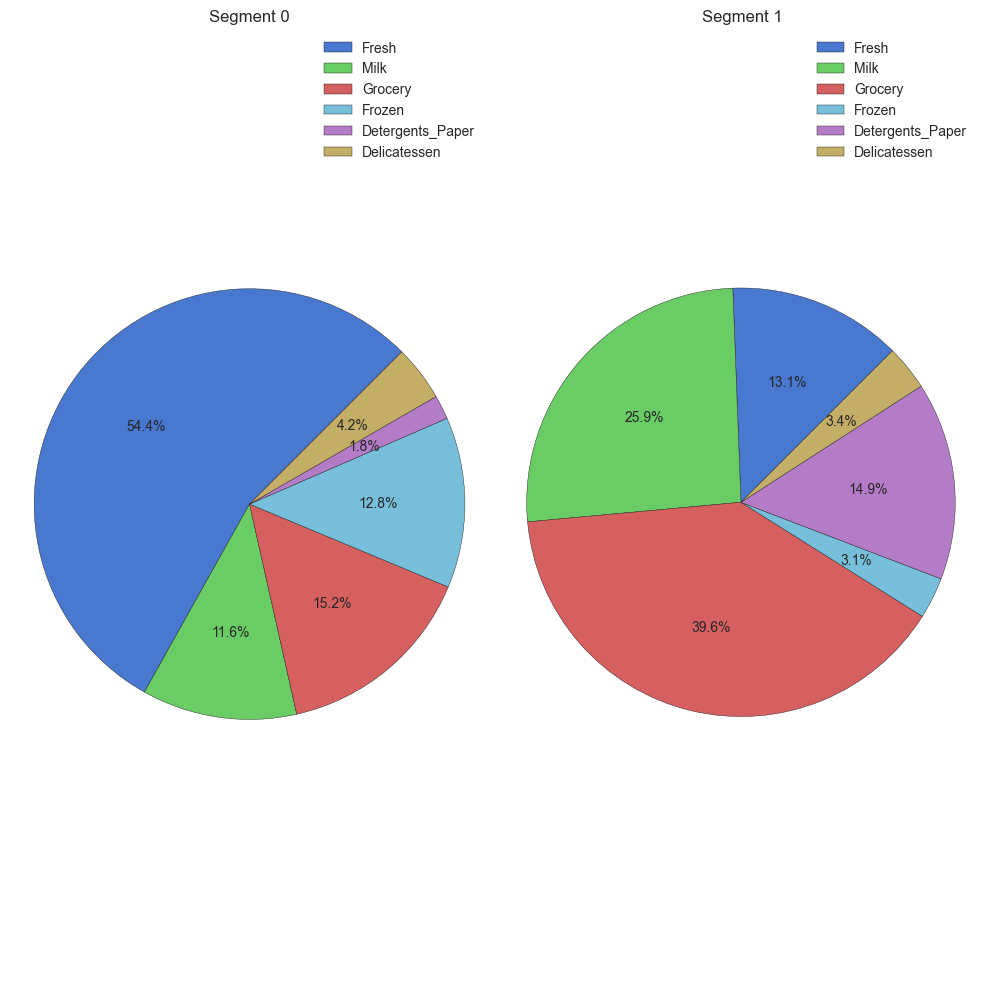

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8867.0  1897.0   2477.0  2088.0             294.0         681.0
Segment 1  4005.0  7900.0  12104.0   952.0            4561.0        1036.0

Fresh          Milk       Grocery        Frozen  \
count     435.000000    435.000000    435.000000    435.000000   
mean    12089.372414   5788.103448   7911.158621   3096.126437   
std     12662.796341   7374.172350   9365.740973   4873.769559   
min         3.000000    112.000000    218.000000     25.000000   
25%      3208.000000   1579.500000   2156.000000    770.500000   
50%      8565.000000   3634.000000   4757.000000   1541.000000   
75%     16934.500000   7168.000000  10665.500000   3559.500000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        435.000000    435.000000  
mean        2848.473563   1536.797701  
std         4679.364623   2833.363881  
min            3.000000      3.000000  
25%          260.000000    411.500000  
50%          813.000000    967.000000  
75%         3935.000000   1825.500000  
max        40827.000000  47943.000000

In [85]:
def plot_pie_chart(sizes,lables,ax,title):

        #if labels is used inside the ax.pie(), the legend is displayed inside the plot
        #ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
        #        shadow=True, startangle=90)
        ax.pie(sizes, autopct='%1.1f%%',
                shadow=False, startangle=45)
        
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(title)
        ax.legend(lables) #To place the legend outside
    

segments =[]
for i in true_centers.index:
     segments.append(list(true_centers.loc[i]/np.sum(true_centers.loc[i])))
    
labels = list(true_centers.columns)

fig1, ax1 = plt.subplots(nrows=1, ncols = 2, figsize=(10,10))
plot_pie_chart(segments[0],labels,ax1[0],"Segment 0")
plot_pie_chart(segments[1],labels,ax1[1],"Segment 1")
#plot_pie_chart(segments[0],labels,ax1[0,0],"Segment 0")
#plot_pie_chart(segments[1],labels,ax1[0,1],"Segment 1")
#plot_pie_chart(segments[2],labels,ax1[1,0],"Segment 2")
#plot_pie_chart(segments[3],labels,ax1[1,1],"Segment 3")
#plot_pie_chart(segments[4],labels,ax1[2,0],"Segment 4")

#fig1.delaxes(ax1.flatten()[5])

plt.tight_layout()
plt.show()
display(true_centers)
display(data.iloc[list(set(data.index) - set(outliers["Index"]))].describe())


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

*Segment-0* might represent markets that sell more of fresh produce such as fruits and vegetables than any other items. These markets sell more of the frozen foods than Delicatessen. These markets sell very less amounts of non-food items such as Detergents_Paper. Segment-0 center has a higher value for fresh products, than any other products. Also except for the fresh value, all other values are way below the average values of the variables. This concludes that segment-0 represents the businesses that sell most of the fresh products than any other products.

*Segment-1* center has the highest value for grocery. Its Fresh value is much lower than the average fresh value. Hence this segment should belong to businesses which use most of the grocery products such as hotels, restaurants, fast food centers etc.



### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [89]:


print "Sampled data:"
#Display the sampled data
indices=get_samples(size=3,seed=12)
display(data.iloc[indices])
# Display the predictions

print "Centers"
display(true_centers)


    

Sampled data:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
208   1537  3748     5838    1859              3381           806
288  16260   594     1296     848               445           258
292   2838  3086     4329    3838               825          1060

Centers


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8867.0  1897.0   2477.0  2088.0             294.0         681.0
Segment 1  4005.0  7900.0  12104.0   952.0            4561.0        1036.0

The _Fresh_ value of 208th observation is way below the center value of _fresh_ (in segment-0), and also the other variables (except frozen) of the 208th observation are greater than the centers of segment-0. Hence 208th observation should belong to Segment-1. 
Since the _Fresh_ value of 288th observation is way higher than the center of the Segment-0's fresh value, we can guess that the 288th observation should belong to Segment-0.
For 292nd observation, the _Fresh_ value is below the center value of Segment-0's fresh value, and its Grocery and Detergents_Paper is also way below the Segment-1's center values for Grocery and Detergents_Paper. Hence it is difficult to classify the 292nd observation. But since we identified that _Grocery_ variable is collinear to the other variables, let us ignore that variable for some time. Since the Detergents_Paper of 292nd observation is way below the Segment-1's center value of Detergents_Paper, we can guess that 292nd observation also should belong to Segment-0.

In [88]:
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
This classification is same as the classification we predicted using the sample values and segments centers.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We will divide the data as follows:

Part-1: Randomly pick some proportion (at least 25%) from Segment-0, and call this as $T_0$ group
Part-2: The remaining part of Segment-0 will be assigned to $C_0$ group
Part-3: Randomly pick some proportion (at least 25%) from Segment-1, and call this as $T_1$ group
Part-4: The remaining part of Segment-1 will be assigned to $C_1$ group

$T_0$ and $T_1$ groups are called the test groups, and the $C_0$ and $C_1$ groups are called the control groups.

We will change the service from 5 days to 3 days to the test groups, while the control groups will have the same service (5 days a week). We measure the customer drop out rates from all the groups. Let the drop out proportions be $PT_0$, $PT_1$, $PC_0$ and $PC_1$ for $T_0$, $T_1$, $C_0$ and $C_1$ respectively. 

We will now test the following hypothesis:

$H_0$: $PT_0 = PT_1 = PC_0 = PC_1$

$H_0$: At least one of the $PT_0$, $PT_1$, $PC_0$ and $PC_1$ differs from the others

We will define the confidence level as 95% (significance level = 0.05)

The F-Statistic is calculated, and if the p-value associated with the F-statistic is less than the significance level (0.05), then we will reject the null hypothesis. If we are unable to reject the null hypothesis, then we will conclude that there will not be any effect on the customers with the change in the service frequency. 

If we reject the null hypothesis, then we compute the Tukey’s _w_ value. Using the Tukey’s _w_ value we can identify the customers segment that has higher dropout rates, and propose not to change the service frequence to that segment's customers.

I referred to the following website: https://onlinecourses.science.psu.edu/stat502/node/140 to get more information on ANOVA testing.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The target variable would be the customer classes (which we identified to be 5 clusters or classes).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

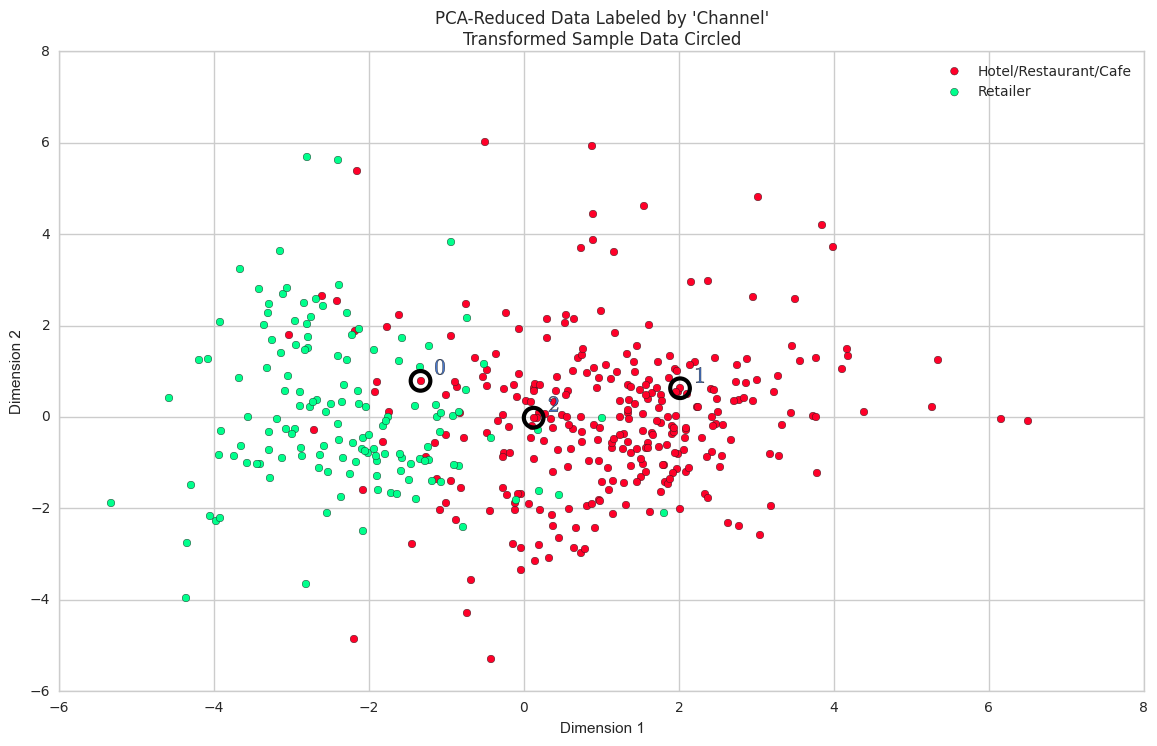

In [30]:
# Display the clustering results based on 'Channel' data
#print reduced_data
#print list(outliers["Index"])
#print pca_samples
#try:
#    data = pd.read_csv("customers.csv")
#    data.drop(['Region'], axis = 1, inplace = True)
#    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
#except:
#    print "Dataset could not be loaded. Is the dataset missing?"
#display(data)
#print pca_samples
vs.channel_results(reduced_data, list(outliers["Index"]), pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Without the _Channel_ variable, we obtained 5 clusters, and we identified that 2 of the observations belong to fast food centers, and one belongs to restaurants. This prediction is consistent with the classifications obtained when considering the _channel_ variable. The 5 clusters identified can be broadly classified as Food businesses and retail markets. If we would classify the data at this level, then 2 clusters would be sufficient. But if we would like to sub-classify these classes, then we should consider 5 clusters. So in summary, if we would like to just consider only 2 classes, then using the _Channel_ variable alone will classify the data. But if we have to classify these clusters further, then we should consider the 5 clusters.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.